In [1]:
#폴더 지정
ROTT_FOLDER='/home/eva/jupyter_home/Yolot8_Object_Detection'

In [5]:
cd $ROTT_FOLDER

/home/eva/jupyter_home/Yolot8_Object_Detection


In [ ]:
#Pytorch 설치하기 
conda install pytorch torchvision torchaudio pytorch-cuda=11.8 -c pytorch -c nvidia

In [11]:
import torch
print(torch.__version__)
print(torch.cuda.is_available()) #cuda 사용가능 여부 확인
print(torch.cuda.get_device_name(0))  #gpu 이름 3070

2.5.1
True
NVIDIA GeForce RTX 3070 Ti Laptop GPU


In [12]:
#yolo 설치하기  version 8설치하기
#2개의 형태로 사용가능!
#1. yolo 라는 실행명령어를 이용해서 탐지와 학습이 가능함!
#2. python 코드로 직접 모델 생성 및 학습 예측이 가능함! 
!pip install ultralytics


  Using cached py_cpuinfo-9.0.0-py3-none-any.whl.metadata (794 bytes)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 3.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 3.9 MB/s eta 0:00:00a 0:00:01
Using cached py_cpuinfo-9.0.0-py3-none-any.whl (22 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0━━━━━━━━━━━━ 1/6 [typing-extensions]
  Attempting uninstall: sympy━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1/6 [typing-extensions]
    Found existing installation: sympy 1.13.3━━━━━━━━━━━━━━━━━ 1/6 [typing-extensions]
    Uninstalling sympy-1.13.3:━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1/6 [typing-extensions]
      Successfully uninstalled sympy-1.13.3━━━━━━━━━━━━━━━━━━━━━━━ 2/6 [sympy]ensions]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [ultralytics] [ultralytics]
ERROR: pip's dependency resolver does not current

In [ ]:
#console에서 1번 실습
#탐지할 임지 2장 이용하기 
#yolo predict mode= yolov8n.pt source='탐색할 이미지 ./dog.jpg' -> 이름 정해진 이미 학습한 가중치 모델 
yolo predict model=yolov8n.pt source='./dog.jpg'


In [ ]:
(keras_env) eva@LAPTOP-5ICSOOU4:~/jupyter_home/Yolot8_Object_Detection$ yolo predict model=yolov8n.pt source='./dog.jpg'
# Ultralytics 8.3.131 🚀 Python-3.10.16 torch-2.5.1 CUDA:0 (NVIDIA GeForce RTX 3070 Ti Laptop GPU, 8192MiB)
# YOLOv8n summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

# image 1/1 /home/eva/jupyter_home/Yolot8_Object_Detection/dog.jpg: 480x640 1 bicycle, 1 car, 1 truck, 1 dog, 40.5ms
# Speed: 3.4ms preprocess, 40.5ms inference, 99.1ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict
# 💡 Learn more at https://docs.ultralytics.com/modes/predict

In [ ]:
#yolov8 재학습 
#datasets/fires_datasets폴더 만들기 그안에 images/ labels폴더 만들기 
#train/ val 폴더 각각 images/labels로 만들기


In [14]:
pwd

'/home/eva/jupyter_home/Yolot8_Object_Detection'

In [ ]:
#class 목록에 대한 파일이 필요함 ! 
#fire.names 파일 만들기 : yolo8_Object_Detection폴더에 생성 
#fire 설명이 xml로 되어 있음 -> yolo형식으로 변경해야 함 ! :프로그램 필요! 

In [16]:
#yolo8_Object_Detection에 설치하기 
!git clone https://github.com/ssaru/convert2Yolo.git

Cloning into 'convert2Yolo'...
remote: Enumerating objects: 215, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 215 (delta 38), reused 35 (delta 35), pack-reused 172 (from 1)
Receiving objects: 100% (215/215), 994.67 KiB | 4.13 MiB/s, done.
Resolving deltas: 100% (95/95), done.


In [ ]:
#(keras_env) eva@LAPTOP-5ICSOOU4:~/jupyter_home/Yolot8_Object_Detection$ unzip fire-dataset.zip 압축풀기
#이제 이미지들 잘 맞게 옮기기

In [ ]:
cp -r /home/eva/jupyter_home/Yolot8_Object_Detection/fire-dataset/train/images/* /home/eva/jupyter_home/Yolot8_Object_Detection/datasets/fire_datasets/images/train/
cp -r /home/eva/jupyter_home/Yolot8_Object_Detection/fire-dataset/validation/images/* /home/eva/jupyter_home/Yolot8_Object_Detection/datasets/fire_datasets/images/val/


In [24]:
cd convert2Yolo #/home/eva/jupyter_home/Yolot8_Object_Detection/convert2Yolo 여기에 들어가기 

/home/eva/jupyter_home/Yolot8_Object_Detection/convert2Yolo


In [29]:
#trian용 txt 만듬 
!python3 example.py \
--datasets VOC \
--img_path /home/eva/jupyter_home/Yolot8_Object_Detection/fire-dataset/train/images/ \
--label /home/eva/jupyter_home/Yolot8_Object_Detection/fire-dataset/train/annotations/ \
--convert_output_path /home/eva/jupyter_home/Yolot8_Object_Detection/datasets/fire_datasets/labels/train/ \  #txt 파일 
--img_type ".jpg" \
--manifest_path /home/eva/jupyter_home/Yolot8_Object_Detection \
--cls_list_file /home/eva/jupyter_home/Yolot8_Object_Detection/fire.names


VOC Parsing:   |████████████████████████████████████████| 100.0% (412/412)  Complete


YOLO Generating:|████████████████████████████████████████| 100.0% (412/412)  Complete


YOLO Saving:   |████████████████████████████████████████| 100.0% (412/412)  Complete



In [31]:
#val용 txt 만듬 
!python3 example.py \
--datasets VOC \
--img_path /home/eva/jupyter_home/Yolot8_Object_Detection/fire-dataset/validation/images/ \
--label /home/eva/jupyter_home/Yolot8_Object_Detection/fire-dataset/validation/annotations/ \
--convert_output_path /home/eva/jupyter_home/Yolot8_Object_Detection/datasets/fire_datasets/labels/val/ \
--img_type ".jpg" \
--manifest_path /home/eva/jupyter_home/Yolot8_Object_Detection \
--cls_list_file /home/eva/jupyter_home/Yolot8_Object_Detection/fire.names


VOC Parsing:   |████████████████████████████████████████| 100.0% (90/90)  Complete


YOLO Generating:|████████████████████████████████████████| 100.0% (90/90)  Complete


YOLO Saving:   |████████████████████████████████████████| 100.0% (90/90)  Complete



In [ ]:
#파일들에 설정 정보를 적는 파일 만들기
path: /home/eva/jupyter_home/Yolot8_Object_Detection/datasets/fire_datasets
train: /home/eva/jupyter_home/Yolot8_Object_Detection/datasets/fire_datasets/images/train
val: /home/eva/jupyter_home/Yolot8_Object_Detection/datasets/fire_datasets/images/val

nc: 1
names: ['fire']

#data.yaml 파일 만들기


In [ ]:
#설정도 끝남 이제 재학습 하기
yolo detect train model=yolov8n.yaml data=/home/eva/jupyter_home/Yolot8_Object_Detection/data.yaml epochs=50 imgsz=640 batch=16 device=0
#Results saved to runs/detect/train6

In [ ]:
#학습결과를 가지고 불 탐지 
!yolo detect predict model=runs/detect/train6/weights/best.pt source=./fire.jpg
# Results saved to runs/detect/predict4

In [39]:
cd ..

/home/eva/jupyter_home/Yolot8_Object_Detection


In [ ]:
###################################################끝! ########################################################################  다른 방법으로 한다 이제 


0: 416x640 1 person, 19.3ms
Speed: 1.8ms preprocess, 19.3ms inference, 2.9ms postprocess per image at shape (1, 3, 416, 640)


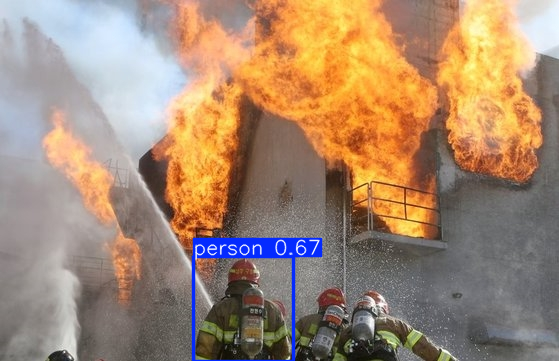

In [41]:
#2번째 코드로 작성해서 하기
# /home/eva/jupyter_home/Yolot8_Object_Detection 여기로 이동 
import cv2
import torch
from ultralytics import YOLO
#모델 로딩하기
model= YOLO('yolov8n.pt')

#이미지 로딩하기 
img=cv2.imread('/home/eva/jupyter_home/Yolot8_Object_Detection/fire.jpg')

#추론predict
result=model(img)

#결과 시각화
result[0].show()
#재 학습 하기 전임

In [43]:
#재학습 해보자

#모델 만들기
model=YOLO('yolov8n.pt')

#재학습
results=model.train(
    data='data.yaml',  #여기에 만들어 놈!
    epochs=50,
    imgsz=640,
    batch=16,
    device=0,  #gpu0번
    workers=4, #병렬처리
    name='yolov8_fire'
)


Ultralytics 8.3.131 🚀 Python-3.10.16 torch-2.5.1 CUDA:0 (NVIDIA GeForce RTX 3070 Ti Laptop GPU, 8192MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8_fire, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pret

train: Scanning /home/eva/jupyter_home/Yolot8_Object_Detection/datasets/fire_datasets/labels/train.cache..


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 25.8±13.3 MB/s, size: 6.8 KB)


val: Scanning /home/eva/jupyter_home/Yolot8_Object_Detection/datasets/fire_datasets/labels/val.cache... 90


Plotting labels to runs/detect/yolov8_fire/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/yolov8_fire
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.07G      1.804      2.905      1.665         33        640: 100%|██████████| 26/26 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████|

                   all         90        138    0.00385      0.754      0.217     0.0833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.25G      1.785      2.259      1.544         33        640: 100%|██████████| 26/26 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████|

                   all         90        138      0.416      0.159      0.168     0.0765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.25G      1.759      2.182      1.603         42        640: 100%|██████████| 26/26 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████|

                   all         90        138       0.34      0.326      0.203     0.0956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.25G      1.813        2.1      1.564         29        640: 100%|██████████| 26/26 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████|

                   all         90        138      0.361      0.319      0.251     0.0848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.25G      1.808      1.988      1.558         33        640: 100%|██████████| 26/26 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████|

                   all         90        138      0.305      0.411      0.297      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.25G      1.831       1.88      1.574         37        640: 100%|██████████| 26/26 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████|

                   all         90        138      0.282      0.413      0.216     0.0722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.25G      1.727       1.82      1.559         31        640: 100%|██████████| 26/26 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████|

                   all         90        138      0.478      0.493      0.455      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.25G      1.773       1.77      1.574         35        640: 100%|██████████| 26/26 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████|

                   all         90        138      0.407      0.514      0.427      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.25G      1.753      1.686      1.528         31        640: 100%|██████████| 26/26 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████|

                   all         90        138      0.505      0.609      0.526      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.25G      1.734      1.616       1.51         45        640: 100%|██████████| 26/26 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████|

                   all         90        138      0.561      0.529      0.506      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.25G      1.731      1.566      1.515         24        640: 100%|██████████| 26/26 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████|

                   all         90        138      0.641      0.558      0.612      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.25G      1.654      1.511       1.45         32        640: 100%|██████████| 26/26 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████|

                   all         90        138       0.71      0.639      0.694      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.25G      1.673       1.47      1.492         36        640: 100%|██████████| 26/26 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████|

                   all         90        138      0.615      0.609      0.604      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.25G       1.68       1.44      1.483         26        640: 100%|██████████| 26/26 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████|

                   all         90        138      0.496      0.594      0.553      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.25G      1.598      1.389      1.437         29        640: 100%|██████████| 26/26 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████|

                   all         90        138      0.835       0.63      0.712      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.25G      1.641      1.364      1.461         32        640: 100%|██████████| 26/26 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████|

                   all         90        138      0.861      0.628      0.752      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.25G      1.611      1.278       1.42         44        640: 100%|██████████| 26/26 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████|

                   all         90        138      0.757      0.652      0.706      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.25G       1.61      1.271      1.411         31        640: 100%|██████████| 26/26 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████|

                   all         90        138      0.769       0.63       0.72      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.25G      1.605      1.241      1.408         29        640: 100%|██████████| 26/26 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████|

                   all         90        138      0.779      0.703      0.725      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.25G      1.582      1.234      1.416         38        640: 100%|██████████| 26/26 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████|

                   all         90        138      0.728      0.652      0.703      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.25G      1.566      1.175      1.411         30        640: 100%|██████████| 26/26 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████|

                   all         90        138      0.742       0.63      0.697      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.25G      1.544      1.174      1.392         33        640: 100%|██████████| 26/26 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████|

                   all         90        138      0.646      0.732      0.737      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.25G      1.557      1.168      1.392         24        640: 100%|██████████| 26/26 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████|

                   all         90        138      0.645      0.645       0.65      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.25G      1.467      1.082      1.333         25        640: 100%|██████████| 26/26 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████|

                   all         90        138      0.729      0.741      0.709      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.25G      1.486      1.064      1.349         29        640: 100%|██████████| 26/26 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████|

                   all         90        138      0.762      0.626      0.684      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.25G      1.448       1.04      1.321         27        640: 100%|██████████| 26/26 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████|

                   all         90        138      0.715      0.696      0.704       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.25G      1.501      1.036      1.337         44        640: 100%|██████████| 26/26 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████|

                   all         90        138      0.768      0.667      0.691      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.25G      1.464      1.047      1.336         24        640: 100%|██████████| 26/26 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████|

                   all         90        138      0.754      0.731       0.73       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.25G      1.499      1.036      1.359         37        640: 100%|██████████| 26/26 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████|

                   all         90        138      0.768      0.732      0.706       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.25G      1.432     0.9796       1.33         33        640: 100%|██████████| 26/26 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████|

                   all         90        138      0.745       0.71      0.674      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.25G      1.424     0.9773      1.321         29        640: 100%|██████████| 26/26 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████|

                   all         90        138      0.749      0.667      0.694      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.25G       1.42     0.9746      1.311         33        640: 100%|██████████| 26/26 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████|

                   all         90        138      0.675      0.674       0.67       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.25G      1.383     0.9727      1.303         32        640: 100%|██████████| 26/26 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████|

                   all         90        138      0.751      0.678      0.695      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.25G      1.335     0.9524      1.266         32        640: 100%|██████████| 26/26 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████|

                   all         90        138      0.749      0.739      0.745      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.25G      1.337      0.921      1.261         34        640: 100%|██████████| 26/26 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████|

                   all         90        138      0.717      0.703      0.701      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.25G      1.323     0.8888      1.262         44        640: 100%|██████████| 26/26 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████|

                   all         90        138      0.722      0.696      0.717      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.25G      1.305     0.8514      1.239         29        640: 100%|██████████| 26/26 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████|

                   all         90        138      0.723       0.71      0.689      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.25G      1.268     0.8197      1.217         29        640: 100%|██████████| 26/26 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████|

                   all         90        138      0.747      0.681      0.695      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.25G       1.29      0.825      1.234         43        640: 100%|██████████| 26/26 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████|

                   all         90        138      0.727      0.717      0.675      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.25G      1.332     0.8717      1.257         37        640: 100%|██████████| 26/26 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████|

                   all         90        138      0.725      0.744      0.741      0.328


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.25G      1.242     0.7942      1.194         18        640: 100%|██████████| 26/26 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████|

                   all         90        138      0.801      0.702      0.734      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.25G      1.221      0.747      1.191         13        640: 100%|██████████| 26/26 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████|

                   all         90        138      0.792      0.746      0.712      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.25G      1.188      0.718      1.166         14        640: 100%|██████████| 26/26 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████|

                   all         90        138      0.754      0.755      0.722      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.25G      1.175     0.6798      1.149         17        640: 100%|██████████| 26/26 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████|

                   all         90        138      0.784      0.709      0.721      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.25G      1.183     0.6738      1.164         15        640: 100%|██████████| 26/26 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████|

                   all         90        138      0.791      0.783       0.76      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.25G      1.108     0.6466      1.111         15        640: 100%|██████████| 26/26 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████|

                   all         90        138      0.818       0.71      0.744       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.25G       1.12     0.6549      1.121         13        640: 100%|██████████| 26/26 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████|

                   all         90        138      0.801      0.746      0.734      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.25G       1.11     0.6214      1.123         17        640: 100%|██████████| 26/26 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████|

                   all         90        138      0.794      0.727      0.749      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.25G      1.097     0.6351       1.11         21        640: 100%|██████████| 26/26 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████|

                   all         90        138      0.808      0.763      0.751      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.25G       1.06     0.6071      1.097         13        640: 100%|██████████| 26/26 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████|

                   all         90        138      0.838      0.754      0.751      0.335



50 epochs completed in 0.052 hours.
Optimizer stripped from runs/detect/yolov8_fire/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/yolov8_fire/weights/best.pt, 6.2MB

Validating runs/detect/yolov8_fire/weights/best.pt...
Ultralytics 8.3.131 🚀 Python-3.10.16 torch-2.5.1 CUDA:0 (NVIDIA GeForce RTX 3070 Ti Laptop GPU, 8192MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████|


                   all         90        138      0.643      0.732      0.737      0.341
Speed: 0.1ms preprocess, 1.4ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/yolov8_fire



0: 416x640 9 fires, 18.6ms
Speed: 2.5ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 640)


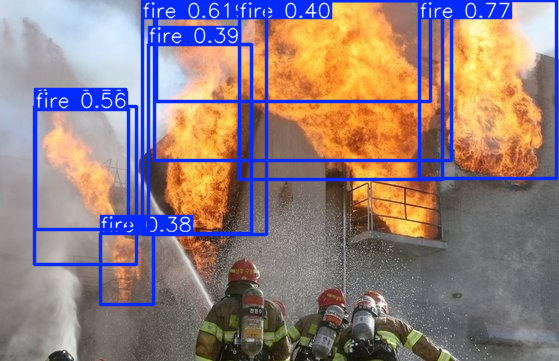

In [49]:
#결과 확인하기
#Results saved to runs/detect/yolov8_fire
model=YOLO('/home/eva/jupyter_home/Yolot8_Object_Detection/runs/detect/yolov8_fire/weights/best.pt')
img=cv2.imread('/home/eva/jupyter_home/Yolot8_Object_Detection/fire.jpg')

#추론predict
result=model(img)

#결과 시각화
result[0].show()